# starter code

In [109]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
plt.style.use("fivethirtyeight")
from sklearn.model_selection import StratifiedKFold #added additional sklearn
from sklearn.neighbors import KNeighborsClassifier #added additional sklearn

In [110]:
import pandas as pd
df = pd.read_csv("Indiegogoproject.csv")

In [105]:
df.columns

Index([u'bullet_point', u'category', u'category_url', u'clickthrough_url',
       u'close_date', u'currency', u'funds_raised_amount',
       u'funds_raised_percent', u'image_url', u'is_indemand', u'is_pre_launch',
       u'offered_by', u'open_date', u'price_offered', u'price_retail',
       u'product_id', u'product_stage', u'project_id', u'project_type',
       u'source_url', u'tagline', u'title'],
      dtype='object')

In [ ]:
df.shape

In [111]:
df.head(3)

,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,...,open_date,price_offered,price_retail,product_id,product_stage,project_id,project_type,source_url,tagline,title
0,null,Art,/explore/art,/projects/100-campaigns-in-one-help-our-creati...,2013-05-10T23:59:59-07:00,USD,4643,0.21104545454545454,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,2013-03-10T14:48:15-07:00,null,null,null,null,248794,campaign,https://www.indiegogo.com/explore/all?project_...,"ONCE upon a time, a photographer needed a subj...",100 CAMPAIGNS IN ONE: Help Our Creative Collec...
1,null,Art,/explore/art,/projects/the-giant-cock-car-our-favorite-chic...,2013-08-08T23:59:59-07:00,USD,1801,1.0005555555555556,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,2013-07-22T16:56:59-07:00,null,null,null,null,472439,campaign,https://www.indiegogo.com/explore/all?project_...,The Giant Cock Car is an artistic vehicle buil...,"The Giant Cock Car, our favorite Chicken"
2,null,Art,/explore/art,/projects/30x30x30,2013-10-26T23:59:59-07:00,USD,3020,0.26260869565217393,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,2013-10-01T14:15:57-07:00,null,null,null,null,513287,campaign,https://www.indiegogo.com/explore/all?project_...,30 Poems Written by Stephanie Pruitt -- in 30 ...,30x30x30


# convert date and time

In [84]:
df['close_date1'] = pd.to_datetime(df.close_date)
print (df)

ValueError: Unknown string format

# Drop null columns 

In [57]:
#df.drop('bullet_point', axis = 1, inplace = True)
#df.drop('price_offered', axis = 1, inplace = True)
#df.drop('price_retail', axis = 1, inplace = True)
df.drop(['bullet_point','price_offered','price_retail'], axis = 1, inplace = True)


In [8]:
df.head(1)

,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,offered_by,open_date,product_id,product_stage,project_id,project_type,source_url,tagline,title
0,Art,/explore/art,/projects/100-campaigns-in-one-help-our-creati...,2013-05-10T23:59:59-07:00,USD,4643,0.21104545454545454,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-03-10T14:48:15-07:00,null,null,248794,campaign,https://www.indiegogo.com/explore/all?project_...,"ONCE upon a time, a photographer needed a subj...",100 CAMPAIGNS IN ONE: Help Our Creative Collec...


In [123]:
pd.isnull(df)

,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,offered_by,open_date,product_id,product_stage,project_id,project_type,source_url,tagline,title
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
df[pd.isnull(df).any(axis=1)]

,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,offered_by,open_date,product_id,product_stage,project_id,project_type,source_url,tagline,title
64,Art,/explore/art,/projects/--700,2011-11-27T23:59:00-08:00,USD,2100,0.14,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2011-07-30T08:36:23-07:00,null,null,36771,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,NaN
91,Art,/explore/art,/projects/grc-2012-2013,2012-08-07T23:59:59-07:00,USD,940,1.88,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2012-07-26T14:03:03-07:00,null,null,162362,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,GRC 2012-2013
1376,Dance & Theater,/explore/dance-theater,/projects/--16885,2012-08-14T23:59:59-07:00,USD,18600,0.93,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2012-06-30T20:00:01-07:00,null,null,155200,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,NaN
1679,Dance & Theater,/explore/dance-theater,/projects/onassis-world-premier-at-the-stella-...,2012-06-03T23:59:59-07:00,USD,2200,0.22,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2012-05-04T11:57:42-07:00,null,null,103422,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,Onassis. World Premier At The Stella Adler The...
2312,Comics,/explore/comics,/projects/the-forgotten-land-fantasy-novel,2013-02-28T23:59:59-08:00,USD,320,0.10666666666666667,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-01-13T13:38:44-08:00,null,null,313164,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,The Forgotten Land Fantasy Novel
2415,Comics,/explore/comics,/projects/comics-book-from-sheikh-nazim-sohbet...,2014-07-13T23:59:59-07:00,USD,2,4.0E-4,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2014-06-03T09:32:31-07:00,null,null,811429,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,Comics book from Sheikh Nazim sohbet stories. ...
2995,Photography,/explore/photography,/projects/--18939,2013-07-05T23:59:59-07:00,USD,5005,1.001,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-05-06T09:23:17-07:00,null,null,402577,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,NaN
3005,Photography,/explore/photography,/projects/hostice,2013-11-22T23:59:59-08:00,USD,20,0.006666666666666667,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-10-03T11:38:42-07:00,null,null,544313,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,Hostice
3113,Photography,/explore/photography,/projects/if-you-dig-my-photos-buy-a-print-or-...,2011-07-04T23:59:00-07:00,USD,870,0.2845927379784102,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2011-05-05T16:31:14-07:00,null,null,24819,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,"If you dig my photos, buy a print or photoshoo..."
3174,Photography,/explore/photography,/projects/snapizzi,2013-10-02T23:59:59-07:00,USD,75,0.001,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-09-02T16:20:57-07:00,null,null,483312,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,Snapizzi


In [59]:
df.dropna()

,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,offered_by,open_date,product_id,product_stage,project_id,project_type,source_url,tagline,title
0,Art,/explore/art,/projects/100-campaigns-in-one-help-our-creati...,2013-05-10T23:59:59-07:00,USD,4643,0.21104545454545454,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-03-10T14:48:15-07:00,null,null,248794,campaign,https://www.indiegogo.com/explore/all?project_...,"ONCE upon a time, a photographer needed a subj...",100 CAMPAIGNS IN ONE: Help Our Creative Collec...
1,Art,/explore/art,/projects/the-giant-cock-car-our-favorite-chic...,2013-08-08T23:59:59-07:00,USD,1801,1.0005555555555556,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-07-22T16:56:59-07:00,null,null,472439,campaign,https://www.indiegogo.com/explore/all?project_...,The Giant Cock Car is an artistic vehicle buil...,"The Giant Cock Car, our favorite Chicken"
2,Art,/explore/art,/projects/30x30x30,2013-10-26T23:59:59-07:00,USD,3020,0.26260869565217393,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-10-01T14:15:57-07:00,null,null,513287,campaign,https://www.indiegogo.com/explore/all?project_...,30 Poems Written by Stephanie Pruitt -- in 30 ...,30x30x30
3,Art,/explore/art,/projects/farmer-tans-calendar-printing,2014-10-16T23:59:59-07:00,USD,35711,8.92775,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2014-09-16T06:54:31-07:00,null,null,866783,campaign,https://www.indiegogo.com/explore/all?project_...,babes with vegetables raising money to buy an ...,Farmer Tans Calendar Printing
4,Art,/explore/art,/projects/solo-gallery-shows-bear-dancer-studios,2013-03-01T23:59:59-08:00,USD,3100,1.0333333333333334,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-01-31T00:03:01-08:00,null,null,325793,campaign,https://www.indiegogo.com/explore/all?project_...,Seeking funding to do my first 2 solo gallery ...,Solo Gallery Shows - Bear Dancer Studios
5,Art,/explore/art,/projects/bunker-projects-artist-residency-gal...,2014-02-16T23:59:59-08:00,USD,5500,0.55,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2014-01-03T16:27:27-08:00,null,null,618504,campaign,https://www.indiegogo.com/explore/all?project_...,Creating a space for multi-disciplinary artist...,BUNKER Projects Artist Residency & Gallery Space
6,Art,/explore/art,/projects/iceland-artist-residency-deposit-art,2018-03-09T23:59:59-08:00,CAD,806,0.7863414634146342,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,false,null,2018-02-07T20:07:42-08:00,null,null,2336824,campaign,https://www.indiegogo.com/explore/all?project_...,$25 Art Prints to Pay Deposit,Iceland Artist Residency Deposit
7,Art,/explore/art,/projects/the-infinite-portal-for-sunshine,2013-08-16T23:59:59-07:00,USD,3998,0.32385581206966385,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-06-17T10:37:24-07:00,null,null,435725,campaign,https://www.indiegogo.com/explore/all?project_...,"""The Sunshrine"" memorial portal art installati...",The Infinite Portal for Sunshine
8,Art,/explore/art,/projects/transplant-an-art-show-honoring-2115...,2013-07-15T23:59:59-07:00,USD,2910,1.0034482758620689,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-06-26T17:28:01-07:00,null,null,449150,campaign,https://www.indiegogo.com/explore/all?project_...,Help bring the spirit of 2115 Taft to the hall...,TRANSPLANT: An art show honoring 2115 Taft
9,Art,/explore/art,/projects/a-start-up-design-firm-that-continua...,2014-01-17T23:59:59-08:00,USD,3955,0.0791,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-11-29T09:42:04-08:00,null,null,556754,campaign,https://www.indiegogo.com/explore/all?project_...,Design meets social innovation. For every pro...,A start-up Design firm that continually gives ...


In [11]:
df.shape

(20970, 19)

In [12]:
df.dropna().shape

(20927, 19)

In [60]:
df.dropna(axis=1, how='all', inplace = True)


In [14]:
df.dropna().shape

(20927, 19)

In [61]:
df.dropna(axis=1, how='any',inplace = True)

In [4]:
df.dropna().shape

(20927, 22)

In [62]:
#df.fillna(0) 
df.fillna(0, inplace=True)

In [6]:
df.dtypes

bullet_point            object
category                object
category_url            object
clickthrough_url        object
close_date              object
currency                object
funds_raised_amount     object
funds_raised_percent    object
image_url               object
is_indemand               bool
is_pre_launch           object
offered_by              object
open_date               object
price_offered           object
price_retail            object
product_id              object
product_stage           object
project_id               int64
project_type            object
source_url              object
tagline                 object
title                   object
dtype: object

# convert data type from objects to float

In [112]:
#convert funds_raised_percent into float from object datatype, which doesn't let filtering. Floats can filter 
df["funds_raised_percent"] = df.funds_raised_percent.convert_objects(convert_numeric=True)

/Users/kimkxle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [113]:
df["funds_raised_amount"] = df.funds_raised_amount.convert_objects(convert_numeric=True)

/Users/kimkxle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [67]:
df["category"] = pd.to_numeric(df['category'])

ValueError: Unable to parse string "Art" at position 0

In [70]:
pd.to_numeric(df['category'],errors='ignore').astype(int)

ValueError: invalid literal for long() with base 10: 'Art'

In [5]:
df.dtypes

bullet_point             object
category                 object
category_url             object
clickthrough_url         object
close_date               object
currency                 object
funds_raised_amount     float64
funds_raised_percent    float64
image_url                object
is_indemand                bool
is_pre_launch            object
offered_by               object
open_date                object
price_offered            object
price_retail             object
product_id               object
product_stage            object
project_id                int64
project_type             object
source_url               object
tagline                  object
title                    object
dtype: object

# sum all the null values in close date - this retitles nulls as nulls

In [161]:
sum(df["close_date"]== "null")

249

# drop nulls in close date and open date , default is axis = 0 so no need to enter. axis = 0 is for rows


In [169]:
df.dropna(subset=["close_date", "open_date"], inplace=True).shape

AttributeError: 'NoneType' object has no attribute 'shape'

# convert close date to date time 

In [171]:
df["close_date_dt"] = pd.to_datetime(df.close_date)

#you can over ride by using the same name and remove the _dt at the end

In [170]:
df["open_date_dt"] = pd.to_datetime(df.open_date)

In [172]:
df.columns

Index([u'bullet_point', u'category', u'category_url', u'clickthrough_url',
       u'close_date', u'currency', u'funds_raised_amount',
       u'funds_raised_percent', u'image_url', u'is_indemand', u'is_pre_launch',
       u'offered_by', u'open_date', u'price_offered', u'price_retail',
       u'product_id', u'product_stage', u'project_id', u'project_type',
       u'source_url', u'tagline', u'title', u'close_date_dt', u'open_date_dt'],
      dtype='object')

In [174]:
df.dtypes

bullet_point                    object
category                        object
category_url                    object
clickthrough_url                object
close_date                      object
currency                        object
funds_raised_amount            float64
funds_raised_percent           float64
image_url                       object
is_indemand                       bool
is_pre_launch                   object
offered_by                      object
open_date                       object
price_offered                   object
price_retail                    object
product_id                      object
product_stage                   object
project_id                       int64
project_type                    object
source_url                      object
tagline                         object
title                           object
close_date_dt           datetime64[ns]
open_date_dt            datetime64[ns]
dtype: object

# drop nulls in dates

In [162]:
ni = df[df['close_date'] == 'null'].index.tolist()

In [163]:
df.drop(ni, inplace=True)

# see unique number of nulls in a column

In [164]:
df.close_date.isnull().sum()

0

# drop rows with nulls use axis = 0 for rows

In [159]:
df.dropna(['close_date'], axis=0, how='any')

TypeError: dropna() got multiple values for keyword argument 'axis'

In [158]:
df.drop(['close_date'] == 'null', axis = 0)

ValueError: labels [False] not contained in axis

In [150]:
df[df['close_date'] == 'null'].index

Int64Index([ 1960,  4545,  4726,  4810,  5086,  6094,  7646,  7647,  8309,
             8802,
            ...
            20960, 20961, 20962, 20963, 20964, 20965, 20966, 20967, 20968,
            20969],
           dtype='int64', length=249)

In [148]:
df["close_date2"] =  pd.to_datetime(df["close_date"])

ValueError: Unknown string format

# drop nulls in date

In [96]:
import datetime as dt
df["close_date"] = df["close_date"].apply(lambda x: 
                                    dt.datetime.strptime(x,'%d%b%Y:%H:%M:%S.%f'))

ValueError: time data '2013-05-10T23:59:59-07:00' does not match format '%d%b%Y:%H:%M:%S.%f'

In [ ]:
from datetime import timedelta,datetime
strs = "2012-05-12T13:04:35.347-07:00"
#replace the last ':' with an empty string, as python UTC offset format is +HHMM
strs = strs[::-1].replace(':','',1)[::-1]
try:
    offset = int(strs[-5:])
except:
    print "Error"

delta = timedelta(hours = offset / 100)
time = datetime.strptime(strs[:-5], "%Y-%m-%dT%H:%M:%S.%f")
time -= delta                #reduce the delta from this time object
print time
#2012-05-12 20:04:35.347000

In [101]:
from datetime import timedelta,datetime
strs = df.close_date
#replace the last ':' with an empty string, as python UTC offset format is +HHMM
strs = strs[::-1].replace(':','',1)[::-1]
try:
    offset = int(strs[-5:])
except:
    print "Error"

delta = timedelta(hours = offset / 100)
time = datetime.datetime(strs[:-5], "%Y-%m-%dT%H:%M:%S.%f")
time -= delta                #reduce the delta from this time object
print time
#2012-05-12 20:04:35.347000

ValueError: For argument "inplace" expected type bool, received type int.

In [91]:
df["close_date"] = df.close_date.convert_objects(convert_numeric=True)

/Users/kimkxle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [122]:
import dateutil.parser

d = dateutil.parser.parse(df['close_date'])
print(d.strftime('%m/%d/%Y'))

TypeError: Parser must be a string or character stream, not Series

In [126]:
from datetime import datetime
date_format = "%Y-%m-%dT%H:%M:%S.%fZ" 
datetime.strptime(df['close_date'], date_format)
datetime.datetime(2008, 9, 26, 1, 51, 42)

NameError: name 'close_date' is not defined

In [103]:
df['close_date'] = pd.to_datetime(df['close_date'])

ValueError: Unknown string format

In [73]:
df.round({'funds_raised_percent': 2})
#df.round(2)
#df['funds_raised_percent']

,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,...,price_offered,price_retail,product_id,product_stage,project_id,project_type,source_url,tagline,title,int_category
0,null,Art,/explore/art,/projects/100-campaigns-in-one-help-our-creati...,2013-05-10T23:59:59-07:00,USD,4643.0,0.21,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,248794,campaign,https://www.indiegogo.com/explore/all?project_...,"ONCE upon a time, a photographer needed a subj...",100 CAMPAIGNS IN ONE: Help Our Creative Collec...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,null,Art,/explore/art,/projects/the-giant-cock-car-our-favorite-chic...,2013-08-08T23:59:59-07:00,USD,1801.0,1.00,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,472439,campaign,https://www.indiegogo.com/explore/all?project_...,The Giant Cock Car is an artistic vehicle buil...,"The Giant Cock Car, our favorite Chicken","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,null,Art,/explore/art,/projects/30x30x30,2013-10-26T23:59:59-07:00,USD,3020.0,0.26,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,513287,campaign,https://www.indiegogo.com/explore/all?project_...,30 Poems Written by Stephanie Pruitt -- in 30 ...,30x30x30,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,null,Art,/explore/art,/projects/farmer-tans-calendar-printing,2014-10-16T23:59:59-07:00,USD,35711.0,8.93,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,866783,campaign,https://www.indiegogo.com/explore/all?project_...,babes with vegetables raising money to buy an ...,Farmer Tans Calendar Printing,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,null,Art,/explore/art,/projects/solo-gallery-shows-bear-dancer-studios,2013-03-01T23:59:59-08:00,USD,3100.0,1.03,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,325793,campaign,https://www.indiegogo.com/explore/all?project_...,Seeking funding to do my first 2 solo gallery ...,Solo Gallery Shows - Bear Dancer Studios,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,null,Art,/explore/art,/projects/bunker-projects-artist-residency-gal...,2014-02-16T23:59:59-08:00,USD,5500.0,0.55,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,618504,campaign,https://www.indiegogo.com/explore/all?project_...,Creating a space for multi-disciplinary artist...,BUNKER Projects Artist Residency & Gallery Space,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,null,Art,/explore/art,/projects/iceland-artist-residency-deposit-art,2018-03-09T23:59:59-08:00,CAD,806.0,0.79,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,2336824,campaign,https://www.indiegogo.com/explore/all?project_...,$25 Art Prints to Pay Deposit,Iceland Artist Residency Deposit,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,null,Art,/explore/art,/projects/the-infinite-portal-for-sunshine,2013-08-16T23:59:59-07:00,USD,3998.0,0.32,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,435725,campaign,https://www.indiegogo.com/explore/all?project_...,"""The Sunshrine"" memorial portal art installati...",The Infinite Portal for Sunshine,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,null,Art,/explore/art,/projects/transplant-an-art-show-honoring-2115...,2013-07-15T23:59:59-07:00,USD,2910.0,1.00,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,449150,campaign,https://www.indiegogo.com/explore/all?project_...,Help bring the spirit of 2115 Taft to the hall...,TRANSPLANT: An art show honoring 2115 Taft,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,null,Art,/explore/art,/projects/a-start-up-design-firm-that-continua...,2014-01-17T23:59:59-08:00,USD,3955.0,0.08,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,556754,c

In [27]:
df[(df.funds_raised_percent>=1)]

,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,offered_by,open_date,product_id,product_stage,project_id,project_type,source_url
1,Art,/explore/art,/projects/the-giant-cock-car-our-favorite-chic...,2013-08-08T23:59:59-07:00,USD,1801,1.000556,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-07-22T16:56:59-07:00,null,null,472439,campaign,https://www.indiegogo.com/explore/all?project_...
3,Art,/explore/art,/projects/farmer-tans-calendar-printing,2014-10-16T23:59:59-07:00,USD,35711,8.927750,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2014-09-16T06:54:31-07:00,null,null,866783,campaign,https://www.indiegogo.com/explore/all?project_...
4,Art,/explore/art,/projects/solo-gallery-shows-bear-dancer-studios,2013-03-01T23:59:59-08:00,USD,3100,1.033333,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-01-31T00:03:01-08:00,null,null,325793,campaign,https://www.indiegogo.com/explore/all?project_...
8,Art,/explore/art,/projects/transplant-an-art-show-honoring-2115...,2013-07-15T23:59:59-07:00,USD,2910,1.003448,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-06-26T17:28:01-07:00,null,null,449150,campaign,https://www.indiegogo.com/explore/all?project_...
11,Art,/explore/art,/projects/lord-whitney-and-jack-hudson-present...,2013-04-25T23:59:59-07:00,GBP,769,1.281667,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-04-05T09:23:09-07:00,null,null,375054,campaign,https://www.indiegogo.com/explore/all?project_...
13,Art,/explore/art,/projects/throne-of-visions,2013-06-07T23:59:59-07:00,USD,2649,1.059600,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-05-15T00:19:22-07:00,null,null,399439,campaign,https://www.indiegogo.com/explore/all?project_...
14,Art,/explore/art,/projects/novara-jazz-dieci-anni-di-immagini,2013-05-10T23:59:59-07:00,EUR,3506,1.168667,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-03-30T02:28:25-07:00,null,null,368603,campaign,https://www.indiegogo.com/explore/all?project_...
16,Art,/explore/art,/projects/past-campaign,2013-10-11T23:59:59-07:00,CAD,18751,1.041722,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-08-24T02:11:10-07:00,null,null,506292,campaign,https://www.indiegogo.com/explore/all?project_...
17,Art,/explore/art,/projects/stages--2,2013-09-28T23:59:59-07:00,CAD,5120,1.024000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-08-19T14:15:09-07:00,null,null,495196,campaign,https://www.indiegogo.com/explore/all?project_...
19,Art,/explore/art,/projects/save-this-historic-san-francisco-mural,2013-10-26T23:59:59-07:00,USD,11377,1.137700,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-09-11T11:08:25-07:00,null,null,467630,campaign,https://www.indiegogo.com/explore/all?project_...


# count by category

In [68]:
df.groupby('category').category.count().sort_values(ascending=False)

category
Home                       894
Travel & Outdoors          875
Phones & Accessories       864
Health & Fitness           863
Fashion & Wearables        861
Productivity               849
Comics                     841
Local Businesses           840
Art                        840
Dance & Theater            840
Education                  840
Environment                840
Film                       840
Writing & Publishing       840
Music                      840
Photography                840
Video Games                840
Animal Rights              840
Transportation             835
Food & Beverages           825
Human Rights               759
Web Series & TV Shows      725
Audio                      531
Camera Gear                470
Wellness                   393
Culture                    352
Energy & Green Tech        309
Tabletop Games             278
Podcasts, Blogs & Vlogs    114
Spirituality                92
Name: category, dtype: int64

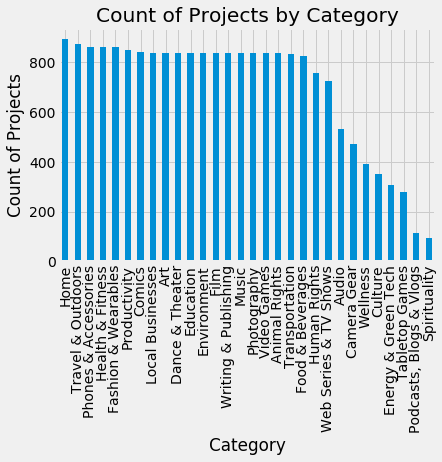

In [35]:
df.groupby('category').category.count().sort_values(ascending=False).plot(kind='bar')

plt.title("Count of Projects by Category")
plt.xlabel("Category")
plt.ylabel("Count of Projects")
plt.show( )


In [36]:
df.groupby('category').funds_raised_percent.count().sort_values(ascending=False)

category
Home                       894
Travel & Outdoors          875
Phones & Accessories       864
Health & Fitness           863
Fashion & Wearables        861
Productivity               849
Comics                     841
Local Businesses           840
Art                        840
Dance & Theater            840
Education                  840
Environment                840
Film                       840
Writing & Publishing       840
Music                      840
Photography                840
Video Games                840
Animal Rights              840
Transportation             835
Food & Beverages           825
Human Rights               759
Web Series & TV Shows      725
Audio                      531
Camera Gear                470
Wellness                   393
Culture                    352
Energy & Green Tech        309
Tabletop Games             278
Podcasts, Blogs & Vlogs    114
Spirituality                92
Name: funds_raised_percent, dtype: int64

In [107]:
df.groupby('category').funds_raised_amount.agg(['count','min','max','median','mean'])

,count,min,max,median,mean
category,,,,,
Animal Rights,840,0.0,115126.0,1086.0,2836.773810
Art,840,2.0,777871.0,1647.5,5462.880952
Audio,511,0.0,3429046.0,4797.0,136789.412916
Camera Gear,461,0.0,3317655.0,1040.0,67370.921909
Comics,840,0.0,124040.0,633.0,2327.158333
Culture,352,0.0,286087.0,708.5,5402.139205
Dance & Theater,840,0.0,51636.0,2081.5,3767.517857
Education,840,0.0,163534.0,2095.0,5566.117857
Energy & Green Tech,307,0.0,13288449.0,364.0,94893.032573


In [17]:
#box plot
df.[['category']].plot(kind = 'box')

SyntaxError: invalid syntax (<ipython-input-17-3b9af5d76b38>, line 2)

In [17]:
df.category

0                      Art
1                      Art
2                      Art
3                      Art
4                      Art
5                      Art
6                      Art
7                      Art
8                      Art
9                      Art
10                     Art
11                     Art
12                     Art
13                     Art
14                     Art
15                     Art
16                     Art
17                     Art
18                     Art
19                     Art
20                     Art
21                     Art
22                     Art
23                     Art
24                     Art
25                     Art
26                     Art
27                     Art
28                     Art
29                     Art
               ...        
20940    Travel & Outdoors
20941    Travel & Outdoors
20942    Travel & Outdoors
20943    Travel & Outdoors
20944    Travel & Outdoors
20945    Travel & Outdoors
2

In [ ]:

df.columns

# Create column to track Metgoal by Fund Raised  >= 100% 

In [71]:

df['Metgoal'] = df.funds_raised_percent.apply(lambda funds_raised_percent: (funds_raised_percent > 1))
df
                                             
                                        

,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,...,price_offered,price_retail,product_id,product_stage,project_id,project_type,source_url,tagline,title,Metgoal
0,null,Art,/explore/art,/projects/100-campaigns-in-one-help-our-creati...,2013-05-10T23:59:59-07:00,USD,4643.0,0.211045,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,248794,campaign,https://www.indiegogo.com/explore/all?project_...,"ONCE upon a time, a photographer needed a subj...",100 CAMPAIGNS IN ONE: Help Our Creative Collec...,False
1,null,Art,/explore/art,/projects/the-giant-cock-car-our-favorite-chic...,2013-08-08T23:59:59-07:00,USD,1801.0,1.000556,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,472439,campaign,https://www.indiegogo.com/explore/all?project_...,The Giant Cock Car is an artistic vehicle buil...,"The Giant Cock Car, our favorite Chicken",True
2,null,Art,/explore/art,/projects/30x30x30,2013-10-26T23:59:59-07:00,USD,3020.0,0.262609,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,513287,campaign,https://www.indiegogo.com/explore/all?project_...,30 Poems Written by Stephanie Pruitt -- in 30 ...,30x30x30,False
3,null,Art,/explore/art,/projects/farmer-tans-calendar-printing,2014-10-16T23:59:59-07:00,USD,35711.0,8.927750,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,866783,campaign,https://www.indiegogo.com/explore/all?project_...,babes with vegetables raising money to buy an ...,Farmer Tans Calendar Printing,True
4,null,Art,/explore/art,/projects/solo-gallery-shows-bear-dancer-studios,2013-03-01T23:59:59-08:00,USD,3100.0,1.033333,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,325793,campaign,https://www.indiegogo.com/explore/all?project_...,Seeking funding to do my first 2 solo gallery ...,Solo Gallery Shows - Bear Dancer Studios,True
5,null,Art,/explore/art,/projects/bunker-projects-artist-residency-gal...,2014-02-16T23:59:59-08:00,USD,5500.0,0.550000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,618504,campaign,https://www.indiegogo.com/explore/all?project_...,Creating a space for multi-disciplinary artist...,BUNKER Projects Artist Residency & Gallery Space,False
6,null,Art,/explore/art,/projects/iceland-artist-residency-deposit-art,2018-03-09T23:59:59-08:00,CAD,806.0,0.786341,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,2336824,campaign,https://www.indiegogo.com/explore/all?project_...,$25 Art Prints to Pay Deposit,Iceland Artist Residency Deposit,False
7,null,Art,/explore/art,/projects/the-infinite-portal-for-sunshine,2013-08-16T23:59:59-07:00,USD,3998.0,0.323856,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,435725,campaign,https://www.indiegogo.com/explore/all?project_...,"""The Sunshrine"" memorial portal art installati...",The Infinite Portal for Sunshine,False
8,null,Art,/explore/art,/projects/transplant-an-art-show-honoring-2115...,2013-07-15T23:59:59-07:00,USD,2910.0,1.003448,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,449150,campaign,https://www.indiegogo.com/explore/all?project_...,Help bring the spirit of 2115 Taft to the hall...,TRANSPLANT: An art show honoring 2115 Taft,True
9,null,Art,/explore/art,/projects/a-start-up-design-firm-that-continua...,2014-01-17T23:59:59-08:00,USD,3955.0,0.079100,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,556754,campaign,https://www.indiegogo.com/explore/all?project_...,Design meets social innovation. For every pro...,A start-up Design firm that continually gives ...,False


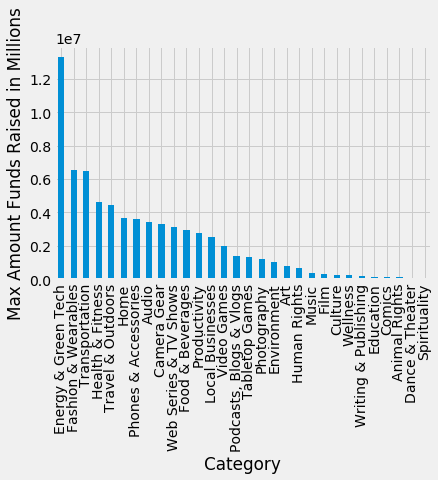

In [110]:
df.groupby('category')['funds_raised_amount'].max().sort_values(ascending=False).plot(kind='bar')

#plt.title("Max Amount Funded by Project Category")
plt.xlabel("Category")
plt.ylabel("Max Amount Funds Raised in Millions")
plt.show( )


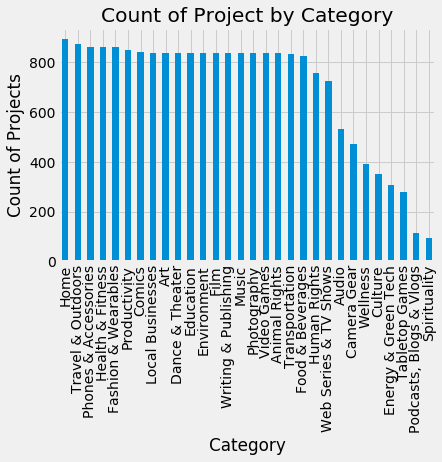

In [114]:
df.groupby('category').category.count().sort_values(ascending=False).plot(kind='bar')

plt.title("Count of Project by Category")
plt.xlabel("Category")
plt.ylabel("Count of Projects")
plt.show( )


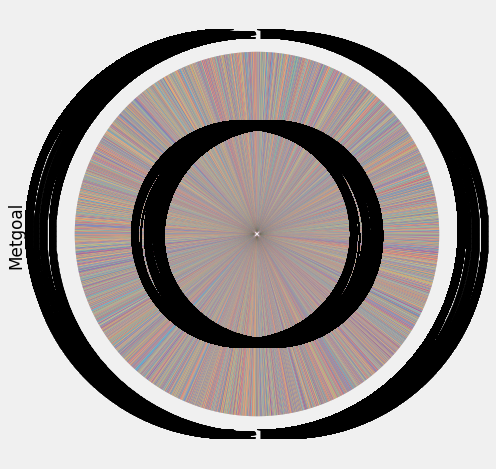

In [76]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df.plot(kind='pie', y = 'Category', ax=ax1, autopct='%1.1f%%',
 startangle=90, shadow=False, labels=df['Category'], legend = False, fontsize=14)


In [95]:
df.groupby(['Metgoal']).Metgoal.count().sort_values(ascending=False)


Metgoal
False    15682
True      5288
Name: Metgoal, dtype: int64

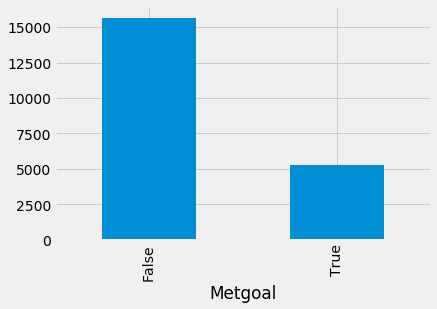

In [85]:
df.groupby(['Metgoal']).Metgoal.count().sort_values(ascending=False).plot(kind='bar')



In [184]:
#df.groupby(['category', 'Metgoal'])['category'].count().sort_values(ascending=False)

Met =df.groupby(['category','Metgoal'])['Metgoal'].count().sort_values(ascending=False)
Met.unstack()

Metgoal,False,True
category,,
Animal Rights,633,207
Art,577,263
Audio,292,239
Camera Gear,328,142
Comics,623,218
Culture,292,60
Dance & Theater,568,272
Education,628,212
Energy & Green Tech,252,57


AttributeError: 'AxesSubplot' object has no attribute 'sort_values'

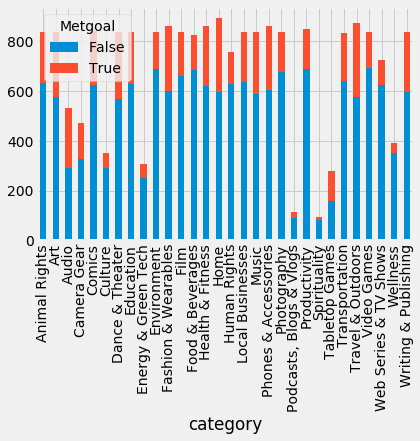

In [177]:
Met.unstack().plot(kind='bar', stacked=True).sort_values(ascending=False)


In [155]:
Met=df[df.funds_raised_percent >1].category.sort_values(ascending=False)
Met           

6960     Writing & Publishing
7312     Writing & Publishing
7323     Writing & Publishing
7326     Writing & Publishing
7329     Writing & Publishing
7330     Writing & Publishing
7346     Writing & Publishing
7099     Writing & Publishing
7097     Writing & Publishing
7095     Writing & Publishing
7091     Writing & Publishing
7090     Writing & Publishing
7087     Writing & Publishing
7086     Writing & Publishing
7085     Writing & Publishing
7081     Writing & Publishing
7072     Writing & Publishing
7068     Writing & Publishing
7065     Writing & Publishing
7062     Writing & Publishing
7347     Writing & Publishing
7350     Writing & Publishing
7355     Writing & Publishing
7193     Writing & Publishing
7192     Writing & Publishing
7190     Writing & Publishing
7182     Writing & Publishing
7180     Writing & Publishing
7179     Writing & Publishing
7315     Writing & Publishing
                 ...         
14164           Animal Rights
14157           Animal Rights
14154     

In [161]:
Mettrue = df.loc[df.funds_raised_percent >1,'category'].count()

In [164]:
mean_fare2 = df.groupby(['category','df.funds_raised_percent >1'])['Mettrue'].count()
mean_fare2

#mean_fare2.unstack().plot(kind='bar')
#plt.show()

#mean_fare2.unstack().plot(kind='bar', stacked=True)
#plt.show()

KeyError: 'df.funds_raised_percent >1'

In [91]:
df.columns

Index([u'bullet_point', u'category', u'category_url', u'clickthrough_url',
       u'close_date', u'currency', u'funds_raised_amount',
       u'funds_raised_percent', u'image_url', u'is_indemand', u'is_pre_launch',
       u'offered_by', u'open_date', u'price_offered', u'price_retail',
       u'product_id', u'product_stage', u'project_id', u'project_type',
       u'source_url', u'tagline', u'title', u'Metgoal'],
      dtype='object')

In [94]:
mean_raised= df.groupby(['Metgoal','category'])['funds_raised_amount'].mean()


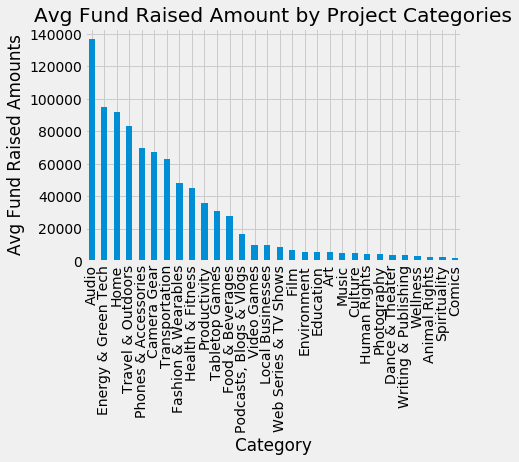

In [89]:
df.groupby(['category']).funds_raised_amount.mean().sort_values(ascending=False).plot(kind='bar')

plt.title("Avg Fund Raised Amount by Project Categories")
plt.xlabel("Category")
plt.ylabel("Avg Fund Raised Amounts")
plt.show( )


# Distribution Plot

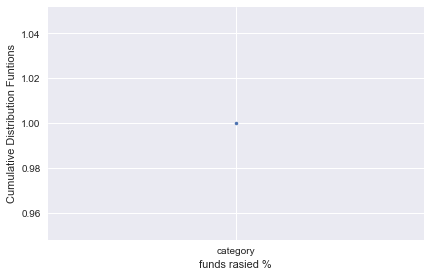

In [32]:
x = np.sort(['category'])
y = np.arange(1, len(x)+1)/len(x)
_ = plt.plot(x, y, marker = '.', linestyle='none')
_ = plt.xlabel('funds rasied %')
_ = plt.ylabel('Cumulative Distribution Funtions')
plt.margins(0.02) #keeps data off plot edges
plt.show()

NameError: name 'py' is not defined

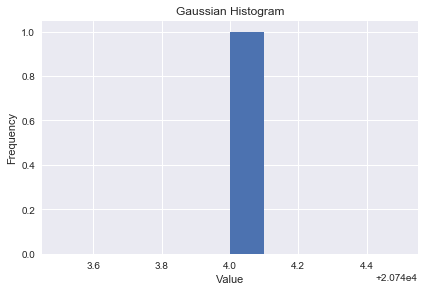

In [30]:
Distribution_chart = df.funds_raised_amount.count()
plt.hist(Distribution_chart)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()

plot_url = py.plot_mpl(fig, filename='mpl-basic-histogram')

In [39]:
df.describe()

,funds_raised_amount,funds_raised_percent,project_id
count,2.074400e+04,2.074400e+04,2.097000e+04
mean,2.886604e+04,7.267739e+01,1.014674e+06
std,2.087055e+05,8.272177e+03,7.974405e+05
min,0.000000e+00,0.000000e+00,3.036000e+03
25%,2.850000e+02,2.977798e-02,3.608840e+05
50%,1.246000e+03,2.224500e-01,6.569285e+05
75%,4.737250e+03,1.002000e+00,1.986712e+06
max,1.328845e+07,1.164458e+06,2.340307e+06


# normal distribution

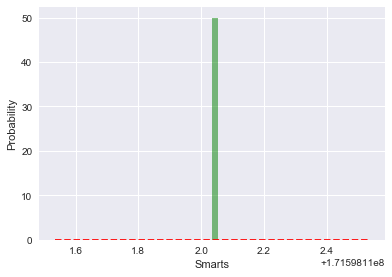

In [40]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


fig = plt.figure()

# example data
mu = df.funds_raised_percent.mean() # mean of distribution
sigma = df.funds_raised_percent.std() # standard deviation of distribution
x = mu + sigma * df.funds_raised_percent.count()

num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)



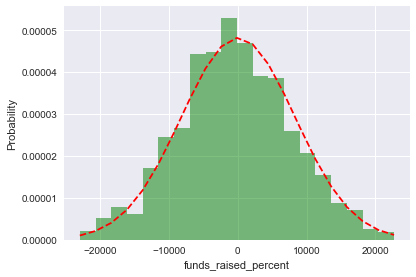

In [52]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


fig = plt.figure()

# example data
mu = df.funds_raised_percent.mean() # mean of distribution
sigma = df.funds_raised_percent.std() # standard deviation of distribution
x = mu + sigma * np.random.randn(1000)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('funds_raised_percent')
plt.ylabel('Probability')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)


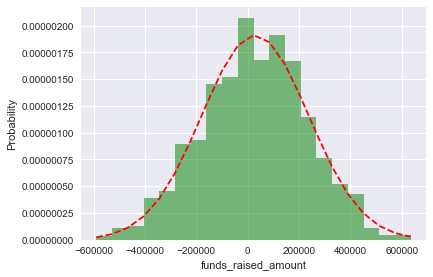

In [54]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


fig = plt.figure()

# example data
mu = df.funds_raised_amount.mean() # mean of distribution
sigma = df.funds_raised_amount.std() # standard deviation of distribution
x = mu + sigma * np.random.randn(1000)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('funds_raised_amount')
plt.ylabel('Probability')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)


ValueError: max must be larger than min in range parameter.

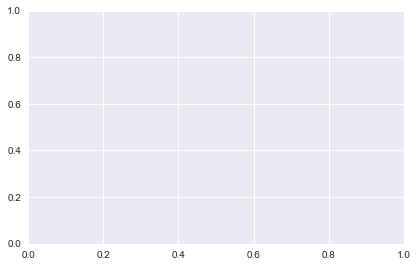

In [16]:
#import seaborn as sns
#sns.set()
_ = plt.hist(df[('funds_raised_amount')])
_ = plt.xlabel('funds rasied %')
_ = plt.ylabel('count')
plt.show()

# pick 5 out of 22 attributes to work with



In [85]:
#create the 5 subset of attributes to work with
#subset = ['category', 'funds_raised_amount', 'funds_raised_percent', 'is_indemand', 'is_pre_launch', 'product_stage', 'tagline']
#df.set_index('category')

subset = ['integer_category','funds_raised_amount', 'funds_raised_percent', 'close_date', 'open_date']

df2 = df[subset].copy()

df2.columns

Index([u'integer_category', u'funds_raised_amount', u'funds_raised_percent',
       u'close_date', u'open_date'],
      dtype='object')

In [86]:
df2.dtypes

integer_category          int64
funds_raised_amount     float64
funds_raised_percent    float64
close_date               object
open_date                object
dtype: object

# convert category into numberical values for train test kmeans

In [64]:
df['category'] = df.category.convert_objects(convert_numeric=True)

/Users/kimkxle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [63]:
df.dtypes

bullet_point            object
category                object
category_url            object
clickthrough_url        object
close_date              object
currency                object
funds_raised_amount     object
funds_raised_percent    object
image_url               object
is_indemand               bool
is_pre_launch           object
offered_by              object
open_date               object
price_offered           object
price_retail            object
product_id              object
product_stage           object
project_id               int64
project_type            object
source_url              object
tagline                 object
title                   object
int_category            object
dtype: object

In [33]:
df['category].astype(int)

SyntaxError: EOL while scanning string literal (<ipython-input-33-4a4b41ac9dc2>, line 1)

In [59]:
int_category = pd.factorize(df['category'])[0]


In [60]:
int_category


array([ 0,  0,  0, ..., 20, 20, 20])

# dummies categories

In [175]:
df_dummies = pd.get_dummies(df, columns=["category"])

In [120]:
df_dummies.category_Art.sum()

840

In [121]:
df_dummies.columns

Index([u'bullet_point', u'category_url', u'clickthrough_url', u'close_date',
       u'currency', u'funds_raised_amount', u'funds_raised_percent',
       u'image_url', u'is_indemand', u'is_pre_launch', u'offered_by',
       u'open_date', u'price_offered', u'price_retail', u'product_id',
       u'product_stage', u'project_id', u'project_type', u'source_url',
       u'tagline', u'title', u'category_Animal Rights', u'category_Art',
       u'category_Audio', u'category_Camera Gear', u'category_Comics',
       u'category_Culture', u'category_Dance & Theater', u'category_Education',
       u'category_Energy & Green Tech', u'category_Environment',
       u'category_Fashion & Wearables', u'category_Film',
       u'category_Food & Beverages', u'category_Health & Fitness',
       u'category_Home', u'category_Human Rights',
       u'category_Local Businesses', u'category_Music',
       u'category_Phones & Accessories', u'category_Photography',
       u'category_Podcasts, Blogs & Vlogs', u'category

In [ ]:
# drop columns


# convert category into numberic 

In [82]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df2["integer_category"] = lb_make.fit_transform(df2["category"])
df2[["category", "integer_category"]].head(10)

,category,integer_category
0,Art,1
1,Art,1
2,Art,1
3,Art,1
4,Art,1
5,Art,1
6,Art,1
7,Art,1
8,Art,1
9,Art,1


In [83]:
df2.dtypes

category                 object
funds_raised_amount     float64
funds_raised_percent    float64
close_date               object
open_date                object
integer_category          int64
dtype: object

In [ ]:
df2.dtypes

In [29]:
str_category = df.category
 
int_lst = [int(object(x)) for x in str_category]
 
print (int_lst)

TypeError: object() takes no parameters

# create subset with new integer category for kmeans

In [106]:
#create the 5 subset of attributes to work with
#subset = ['category', 'funds_raised_amount', 'funds_raised_percent', 'is_indemand', 'is_pre_launch', 'product_stage', 'tagline']
#df.set_index('category')

subset = ['integer_category','category','funds_raised_amount', 'funds_raised_percent', 'close_date', 'open_date']

df2 = df[subset].copy()

df2.columns

KeyError: "['integer_category'] not in index"

In [107]:
df2.iloc[: ,0:2]

,integer_category,category
0,1,Art
1,1,Art
2,1,Art
3,1,Art
4,1,Art
5,1,Art
6,1,Art
7,1,Art
8,1,Art
9,1,Art


In [102]:
df2.groupby(['category', 'integer_category']).count()

,,funds_raised_amount,funds_raised_percent,close_date,open_date
category,integer_category,,,,
Animal Rights,0,840,840,840,840
Art,1,840,840,840,840
Audio,2,511,511,531,531
Camera Gear,3,461,461,470,470
Comics,4,840,840,841,841
Culture,5,352,352,352,352
Dance & Theater,6,840,840,840,840
Education,7,840,840,840,840
Energy & Green Tech,8,307,307,309,309


# train test split before running models

# Clustering

In [87]:
df2.head()

,integer_category,funds_raised_amount,funds_raised_percent,close_date,open_date
0,1,4643.0,0.211045,2013-05-10T23:59:59-07:00,2013-03-10T14:48:15-07:00
1,1,1801.0,1.000556,2013-08-08T23:59:59-07:00,2013-07-22T16:56:59-07:00
2,1,3020.0,0.262609,2013-10-26T23:59:59-07:00,2013-10-01T14:15:57-07:00
3,1,35711.0,8.927750,2014-10-16T23:59:59-07:00,2014-09-16T06:54:31-07:00
4,1,3100.0,1.033333,2013-03-01T23:59:59-08:00,2013-01-31T00:03:01-08:00


In [182]:
#Make a copy of df2 and assign it to X

X = df2.copy()

#Intialize kmeans with 2 clusters and random_state = 10
km = KMeans(n_clusters=2, random_state = 10)

#Fit model on X
km.fit(X)

#Generate labels

##Method 1
labs2 = km.labels_
##Method 2
labs2 = km.predict(X)

#Value_counts
pd.value_counts(labs2)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [67]:
df.head(3)

,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,offered_by,open_date,product_id,product_stage,project_id,project_type,source_url
0,Art,/explore/art,/projects/100-campaigns-in-one-help-our-creati...,2013-05-10T23:59:59-07:00,USD,4643.0,0.211045,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-03-10T14:48:15-07:00,null,null,248794,campaign,https://www.indiegogo.com/explore/all?project_...
1,Art,/explore/art,/projects/the-giant-cock-car-our-favorite-chic...,2013-08-08T23:59:59-07:00,USD,1801.0,1.000556,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-07-22T16:56:59-07:00,null,null,472439,campaign,https://www.indiegogo.com/explore/all?project_...
2,Art,/explore/art,/projects/30x30x30,2013-10-26T23:59:59-07:00,USD,3020.0,0.262609,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,null,null,2013-10-01T14:15:57-07:00,null,null,513287,campaign,https://www.indiegogo.com/explore/all?project_...


In [75]:
df['close_date'] = pd.to_datetime(df['close_date'])

ValueError: Unknown string format